# Test

### Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
import pandas as pd
from ipywidgets import interactive
import ipywidgets as widgets
from ipywidgets import AppLayout, FloatSlider
from mpl_toolkits.mplot3d import Axes3D

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 34008 bytes to pyBspline.py


### Funzioni

In [2]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

### Test

In [3]:
#definisco la dimensionaità:
# - (1,1): funzione da R in R
# - (1,2): curva in 2D (funzione da R in R^2)
# - (1,3): curva in 3D
# - (2,3): superficie in 3D
sh = Bs.shape(2,3)
sh.show()

#defiisco i knot vector
kv = Bs.knot_vector(1,5,[0,1,2,3,4,5,6])
kv.show()

#alloco la Bspline
#ATTENZIONE: devo creare un vettore di knot vector 
# di lunghezza pari alla  dimensionalità della superficie:
# [kv] per una curva
# [kv,kv] per una superficie
# è anche possibile usare knot vector diversi per "dimensioni" diverse
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

dimension   :  2
codimension :  3
polinomial degree :  1
base caridnality  :  5
knots             :  [0 1 2 3 4 5 6]


In [4]:
#cp = bs.control_points()
#print("shape: ",cp.shape)
#print("len  : ",len(cp[0]))

#bs.set_cp(0,(5.0,9.0))
#bs.show("cp")

In [5]:
bs.evaluate(  ( [5.0,2.0] , [ 5.0 ,3.0 ]  ) )

array([[0., 0., 0.],
       [0., 0., 0.]])

In [6]:
x = [ [5.0,2.0] , [5.0,2.0] , [5.0,2.0] ] #[ [1.0,4.0] , [2.0,7.0] , [5.0,4.0] , [9.0,8.0] ]
X = np.asarray(x)
print("X: ",X.size)
X.shape
X = X.reshape((int(X.size/2.0),2))
#len(X)

X:  6


# Dominio 1D

## Codominio 1D

### Funzioni di base

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=6 #base caridnality
v = [-1,0,1,2,3,4,5,6]#np.arange(0,P+N+1)
#print(v)
kv = Bs.knot_vector(P,N,v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1.]


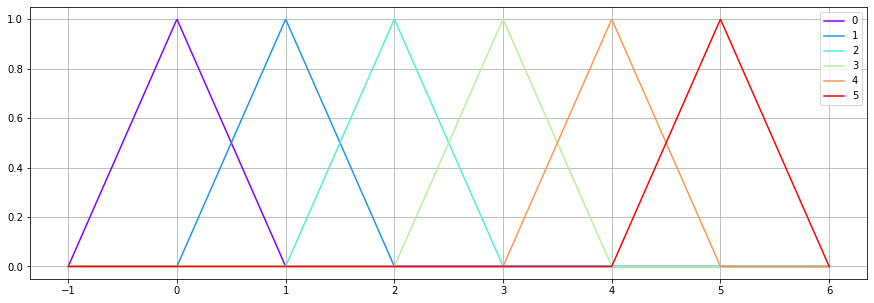

In [3]:
#grafico le funzioni di base
x = np.linspace(min(v),max(v),1000)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.legend()
plt.grid(True)
plt.show()

In [4]:
am = bs.adjacency_matrix()
am

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)"
"(0,)",True,True,False,False,False,False
"(1,)",True,True,True,False,False,False
"(2,)",False,True,True,True,False,False
"(3,)",False,False,True,True,True,False
"(4,)",False,False,False,True,True,True
"(5,)",False,False,False,False,True,True


In [5]:
am = bs.overlap_matrix()
am

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)"
"(0,)",0.4,0.2,None,None,None,None
"(1,)",0.2,0.4,0.2,None,None,None
"(2,)",None,0.2,0.4,0.2,None,None
"(3,)",None,None,0.2,0.4,0.2,None
"(4,)",None,None,None,0.2,0.4,0.2
"(5,)",None,None,None,None,0.2,0.4


In [6]:
sm = bs.stiffness_matrix()
sm

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)"
"(0,)",1,-1,0,0,0,0
"(1,)",-1,2,-1,0,0,0
"(2,)",0,-1,2,-1,0,0
"(3,)",0,0,-1,2,-1,0
"(4,)",0,0,0,-1,2,-1
"(5,)",0,0,0,0,-1,1


#### Derivata delle funzioni di base

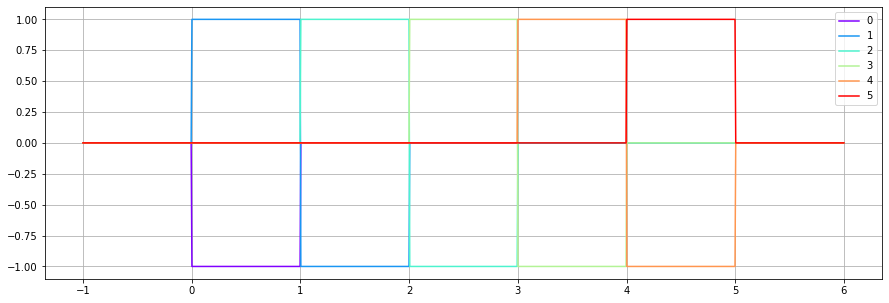

In [7]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

der = bs.derivative()

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Differenza della derivata calcola come Bpline rispetto alla derivata calcolata con gli incrementi finiti

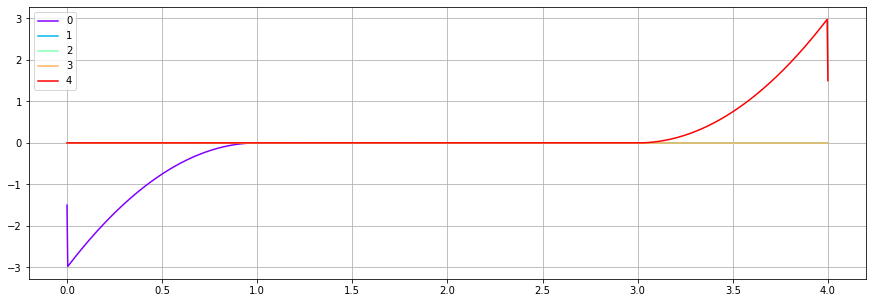

In [11]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    y_diff = derivative(f, x, dx=1e-8)
    
    c = next(colors)
    plt.plot(x, y-y_diff, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Derivata seconda delle funzioni di base

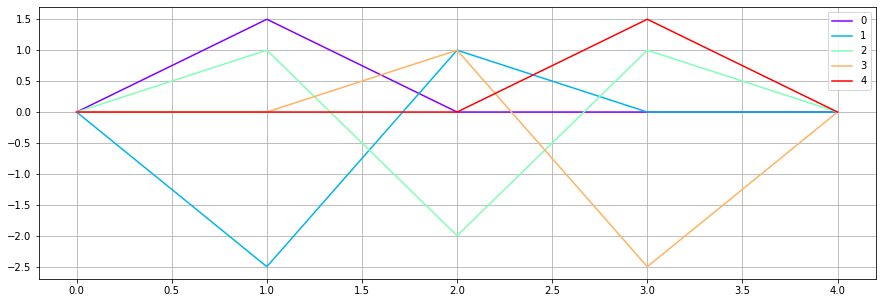

In [12]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative(2)
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

#### Differenza della derivata seconda calcola come Bpline rispetto alla derivata calcolata con gli incrementi finiti

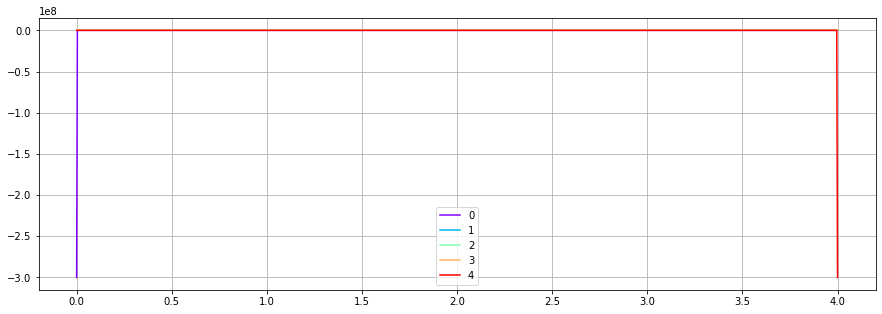

In [13]:
#grafico le funzioni di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative(2)
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    y_diff = derivative(f, x, dx=1e-8,n=2)
    
    c = next(colors)
    plt.plot(x, y-y_diff, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.legend()
plt.grid(True)
plt.show()

### Funzioni in 1D

In [14]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=6 #base caridnality
#
xmin = 0.0
xmax = 4.0
#
v0,step = np.linspace(start=xmin       ,stop=xmax       ,num=N-1,retstep=True)
left    = np.arange  (start=xmin-step*P,stop=xmin       ,step=step)
right   = np.arange  (start=xmax       ,stop=xmax+step*P,step=step)
print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
v = list(left) + list(v0) + list(right)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cp = np.random.rand(N)#[ 2.0, 1.0,  3.0 , -2.0 , 4.0 , 7.0 ]#, 1.0 , 4.0  ]

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0. 1. 2. 3. 4.]
[-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 4.0, 5.0]


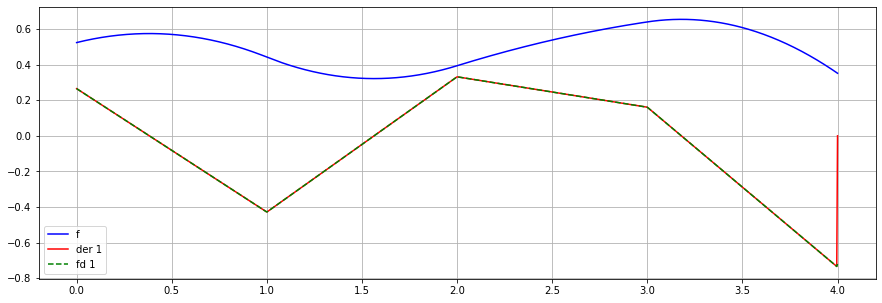

In [15]:
#grafico le funzioni di base
x = np.linspace(min(v0),max(v0),1000)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cp[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )
    
y   = bs.evaluate(x)


der1 = bs.derivative()
der2 = bs.derivative(2)
#der3 = bs.derivative(3)

yd1  = der1.evaluate(x)
yd2  = der2.evaluate(x)
#yd3  = der3.evaluate(x)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
#order: int, optional Number of points to use, must be odd.


ydiff = derivative(f, x, dx=1e-4,n=1)
ydiff2 = derivative(f, x, dx=1e-4,n=2)
#ydiff3 = derivative(f, x, dx=1e-4,n=3,order=5)
    
plt.plot(x, y, color= "blue",label="f")

plt.plot(x, yd1, color= "red",label="der 1",linestyle="-")
plt.plot(x, ydiff, color= "green",label="fd 1",linestyle="--")

#plt.plot(x, yd2, color= "red",label="der 2",linestyle="-")
#plt.plot(x, ydiff2, color= "green",label="fd 2",linestyle="--")

#plt.plot(x, yd3, color= "red",label="der 3",linestyle="-")
#plt.plot(x, ydiff3, color= "green",label="fd 3",linestyle="--")

    
plt.legend()
plt.grid(True)
plt.show()

## Codominio 2D

### Curva in 2D

In [20]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=6 #base caridnality
#
xmin = 0.0
xmax = 5.0
v0 = [ 0,1,2,3,4,5]
v  = [-2,-1,0,1,2,3,4,5,6,7]
#
#v0,step = np.linspace(start=xmin       ,stop=xmax           ,num=N,retstep=True)
#left    = np.arange  (start=xmin-step*(P),stop=xmin           ,step=step)
#right   = np.arange  (start=xmax+step  ,stop=xmax+step*(P+1),step=step)
#print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
#v = list(left) + list(v0) + list(right)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cpx = np.sort(np.random.rand(N))
cpy = np.random.rand(N)

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7]


In [13]:
#grafico le funzioni di base
NN = 1000
x = np.linspace(min(v0),max(v0),NN)

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cpx[i],cpy[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )

#
y   = bs.evaluate(x)
df = pd.DataFrame(y)
df = df.rename(columns={0:"x",1:"y"})
df["x0"] = x
#df.set_index("x0",drop=False,inplace=True)

yfd = derivative(f, x, dx=1e-4,n=1)
ydfn = np.asarray([ [i,j]/(10*np.sqrt(i**2 + j**2)) for i,j in zip(yfd[:,0],yfd[:,1])])
    
der1 = bs.derivative()

#der1 = np.asarray([ [i,j]/(1e4*np.sqrt(i**2 + j**2)) for i,j in zip(der1[:,0],der1[:,1])])

In [14]:
def grafico_interattivo(N):
    
    #y   = bs.evaluate(x)
    yd1 = der1.evaluate(x[N])[0]
    yd1 = yd1/(10*np.sqrt(yd1[0]**2 + yd1[1]**2))
    #print(yd1)
    #print("(",df.loc[N,"x"],df.loc[N,"y"],") :",yd1[0],",",yd1[1])
    print("(%.2f,%.2f) : [%.2f,%.2f]" % (df.loc[N,"x"],df.loc[N,"y"],yd1[0],yd1[1]))
    #print(formatted_float)
    #print(yd1[0])
    
    plt.figure ( 0 , figsize = ( 15 , 5 ) )
   
    #converto in dataframe    
    plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.2)
    plt.scatter(cpx,cpy,color="green")
    plt.scatter(df["x"], df["y"], color= "blue",label="f",s=0.1)
    plt.quiver( [df.loc[N,"x"]] ,[df.loc[N,"y"]] , [yd1[0]] , [yd1[1]] ,\
               scale=1,scale_units="xy",color="blue",width=0.001,label="der1")
    plt.quiver( [df.loc[N,"x"]] ,[df.loc[N,"y"]] , [ydfn[N,0]] , [ydfn[N,1]] ,\
               scale=1,scale_units="xy",color="red",width=0.001,label="fd1")
    
    plt.legend()
    plt.grid(True)
    #plt.xlim(0.0,0.5)
    #plt.ylim(0.0,0.5)
    #aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
    plt.axis('equal')
    plt.show()

In [15]:
#%matplotlib inline
Nw = widgets.IntSlider(value=50, min=0, max=NN ,step=1)
interactive_plot = interactive(grafico_interattivo,N=Nw)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=50, description='N', max=1000), Output()), _dom_classes=('widget-interac…

In [19]:
br = bs.basis_range()
br

[   index  i-min  i-max  x-min  x-max
 0      0      0      4     -2      2
 1      1      1      5     -1      3
 2      2      2      6      0      4
 3      3      3      7      1      5
 4      4      4      8      2      6
 5      5      5      9      3      7]

## Codominio 3D

### Curva in 3D

In [20]:
#definisco la dimensionaità:
sh = Bs.shape(1,3)
#sh.show()

#defiisco i knot vector
P=3 #polinomial degree
N=20 #base caridnality
#
xmin = 0.0
xmax = 5.0
v0 = np.linspace(0,1,N)#[ 0,1,2,3,4,5]
v  = [-2,-1] + list(v0) + [6,7]#[-2,-1,0,1,2,3,4,5,6,7]
#
#v0,step = np.linspace(start=xmin       ,stop=xmax           ,num=N,retstep=True)
#left    = np.arange  (start=xmin-step*(P),stop=xmin           ,step=step)
#right   = np.arange  (start=xmax+step  ,stop=xmax+step*(P+1),step=step)
#print(v0)
#print(left)
#print(right)
#v = [-3, -2,-1,0,1,2,3,4,5,6,7]#np.arange(0,P+N+1)
#
#v = list(left) + list(v0) + list(right)
print(v0)
print(v)

#
kv = Bs.knot_vector(P,N,v)
#kv.show()
cpz = np.linspace(0.,1.,N)#np.random.rand(N)
cpx = np.sin(100*cpz)#np.random.rand(N)
cpy = np.cos(100*cpz)#np.random.rand(N)


#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
[-2, -1, 0.0, 0.05263157894736842, 0.10526315789473684, 0.15789473684210525, 0.21052631578947367, 0.2631578947368421, 0.3157894736842105, 0.3684210526315789, 0.42105263157894735, 0.47368421052631576, 0.5263157894736842, 0.5789473684210527, 0.631578947368421, 0.6842105263157894, 0.7368421052631579, 0.7894736842105263, 0.8421052631578947, 0.894736842105263, 0.9473684210526315, 1.0, 6, 7]


In [21]:
#grafico le funzioni di base
NN = 1000
x = np.linspace(min(v0),max(v0),NN)

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

#imposto i control points
[ bs.set_cp(i,[cpx[i],cpy[i],cpz[i]]) for i in range(0,N)]

f = lambda xx : np.asarray( bs.evaluate(xx) )

#
y   = bs.evaluate(x)
df = pd.DataFrame(y)
df = df.rename(columns={0:"x",1:"y",2:"z"})
df["x0"] = x
#df.set_index("x0",drop=False,inplace=True)

yfd = derivative(f, x, dx=1e-4,n=1)
for i in yfd:
    i = i/np.sqrt(np.sum(np.square((i))))
#ydfn = np.asarray([ [i,j]/(10*np.sqrt(i**2 + j**2)) for i,j in zip(yfd[:,0],yfd[:,1])])
    
der1 = bs.derivative()

#der1 = np.asarray([ [i,j]/(1e4*np.sqrt(i**2 + j**2)) for i,j in zip(der1[:,0],der1[:,1])])

In [22]:
def grafico_interattivo(N):
    
    #y   = bs.evaluate(x)
    yd1 = der1.evaluate(x[N])[0]
    yd1 = 5*yd1/(np.sqrt(yd1[0]**2 + yd1[1]**2))
    #print(yd1)
    #print("(",df.loc[N,"x"],df.loc[N,"y"],") :",yd1[0],",",yd1[1])
    print("(%.2f,%.2f,%.2f) : [%.2f,%.2f,%.2f]" % (df.loc[N,"x"],df.loc[N,"y"],df.loc[N,"z"],\
                                         yd1[0],yd1[1],yd1[2]))
    #print(formatted_float)
    #print(yd1[0])
    
    fig = plt.figure ( 0 , figsize=(8,8) )    
    ax = fig.gca(projection='3d')
    #ax.set_aspect('equal')
    #plt.plot(pyx, pyy, pyz)
   
    #converto in dataframe    
    X = [df.loc[N,"x"] ,df.loc[N,"y"] , df.loc[N,"z"]]
    ax.plot(cpx,cpy,cpz,color="green",label="cp",linestyle="--",alpha=0.2)
    ax.scatter(cpx,cpy,cpz,color="green",marker='o')
    ax.scatter(df["x"], df["y"],df["z"], color= "blue",label="f",s=0.5)
    plt.quiver( *X , [yd1[0]] , [yd1[1]] , [yd1[2]]  , \
               length=0.1, normalize=False,label="der1",color="red")
    #plt.quiver( [X , [ydfn[N,0]] , [ydfn[N,1] ,[ydfn[N,2]] ,\
    #           scale=1,scale_units="xy",color="red",width=0.001,label="fd1")
    
    plt.legend()
    plt.grid(True)
    #plt.xlim(0.0,0.5)
    #plt.ylim(0.0,0.5)
    #aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
    #plt.axis('equal')
    set_axes_equal(ax)
    #ax.set_aspect('equal')
    plt.show()

In [23]:
#%matplotlib inline
#%matplotlib interactive

Nw = widgets.IntSlider(value=100, min=0, max=NN ,step=1)
interactive_plot = interactive(grafico_interattivo,N=Nw)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=100, description='N', max=1000), Output()), _dom_classes=('widget-intera…

## Interpolazione funzione 1D

In [28]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=15 #base caridnality
xmin = 0.
xmax = 10.
v = np.linspace(xmin,xmax,N+P-1)
#print(v)
v = [0] + list(v) + [10] #np.arange(0,P+N+1)
print(v)
#print(v)
kv = Bs.knot_vector(P,N,v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

[0, 0.0, 0.7142857142857143, 1.4285714285714286, 2.142857142857143, 2.857142857142857, 3.5714285714285716, 4.285714285714286, 5.0, 5.714285714285714, 6.428571428571429, 7.142857142857143, 7.857142857142858, 8.571428571428571, 9.285714285714286, 10.0, 10]


In [32]:
def func(x):
    return np.sin(x)#np.full(len(x),1.0)     

cp = bs.approximate(func)
#cp

In [34]:
#bs.overlap_matrix()

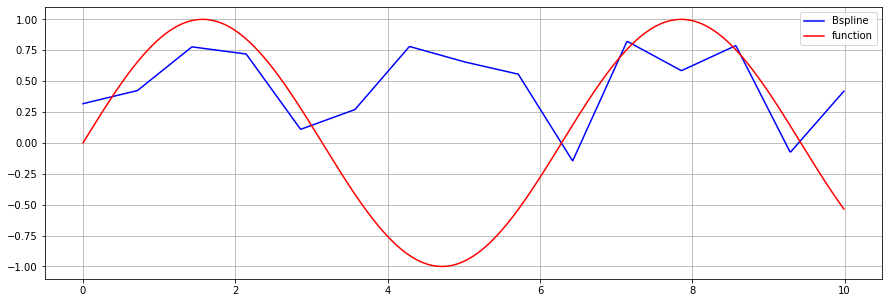

In [35]:
#grafico le funzioni di base
x = np.linspace(xmin,xmax,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

yb = bs.evaluate(x)
yf = func(x)
    
plt.plot(x, yb, color= "blue" ,label="Bspline")
plt.plot(x, yf, color= "red" , label="function")
    
plt.legend()
plt.grid(True)
plt.show()

# Dominio 2D

## Codominio 1D

### Funzioni di base in 2D

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [-1]#[-2, -1]
right = [3]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
print("v0 :", v0)
print("v  :", v)
print("N  :", N)
print("L  :", L)
print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

v0 : [0. 1. 2.]
v  : [-1, 0.0, 1.0, 2.0, 3]
N  : 3
L  : 0
R  : 3


In [3]:
#grafico le funzioni di base
Nx = 20
Ny = 20
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

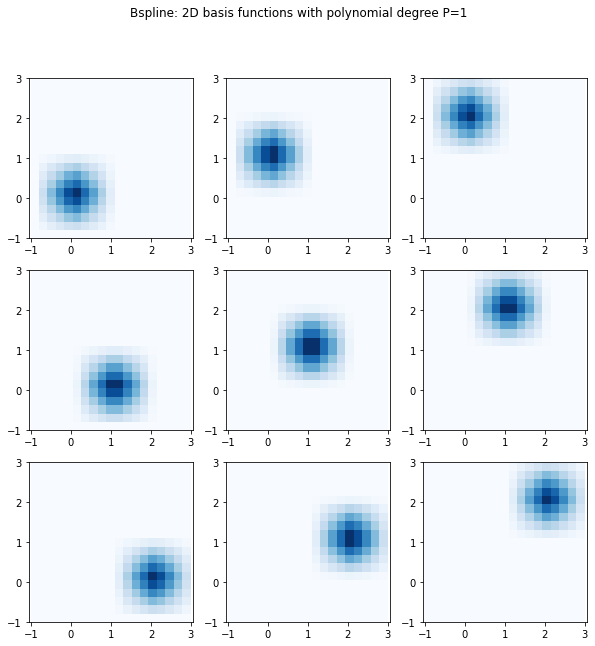

In [4]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

k=1
for i in range(L,R):
    for j in range(L,R):
        #print(k)
        ax = fig.add_subplot(NP, NP, k)#, projection='3d')
        k=k+1
        
        #
        bs.clear_cp()
        bs.set_cp([i,j],1.0)
        #
        z=bs.evaluate(XY) 
        Z=z.reshape(Nx,Ny)
        #        
        ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
        plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.legend()
#plt.grid(True)
plt.show()

### Galerkin

In [5]:
def func_or(x):
    if hasattr(x, '__len__'):
        return np.power(x[:,0],2) + np.power(x[:,1],2)
    else :
        return np.power(x[0],2) + np.power(x[1],2)
        

def func(x):
    if hasattr(x, '__len__'):
        return np.full((len(x),),4.0)
    else :
        return 4.0

In [6]:
a = bs.Galerkin(func)
a

LinAlgError: Singular matrix

In [77]:
bs._cp[2,1]

-3.5999999999999996

In [67]:
ZZ = func_or(XY).reshape(Nx,Ny)

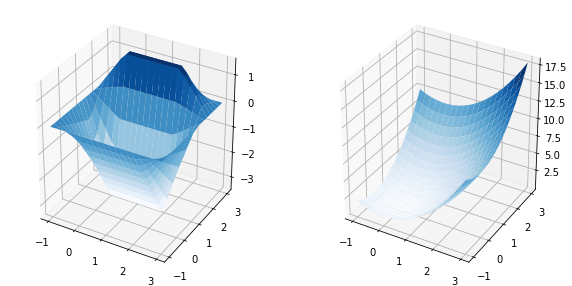

In [68]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
#      
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z , cmap='Blues')#,rstride=1, cstride=1)

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, ZZ , cmap='Blues')#,rstride=1, cstride=1)

#plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.legend()
#plt.grid(True)
plt.show()

In [7]:
bs.stiffness_matrix()

,"(0, 0)","(1, 0)","(2, 0)","(0, 1)","(1, 1)","(2, 1)","(0, 2)","(1, 2)","(2, 2)"
"(0, 0)",0.8,0,0,-0.8,0,0,0,0,0
"(1, 0)",0,0.8,0,0,-0.8,0,0,0,0
"(2, 0)",0,0,0.8,0,0,-0.8,0,0,0
"(0, 1)",-0.8,0,0,1.6,0,0,-0.8,0,0
"(1, 1)",0,-0.8,0,0,1.6,0,0,-0.8,0
"(2, 1)",0,0,-0.8,0,0,1.6,0,0,-0.8
"(0, 2)",0,0,0,-0.8,0,0,0.8,0,0
"(1, 2)",0,0,0,0,-0.8,0,0,0.8,0
"(2, 2)",0,0,0,0,0,-0.8,0,0,0.8


In [8]:
bs.adjacency_matrix()

,"(0, 0)","(1, 0)","(2, 0)","(0, 1)","(1, 1)","(2, 1)","(0, 2)","(1, 2)","(2, 2)"
"(0, 0)",True,True,False,True,True,False,False,False,False
"(1, 0)",True,True,True,True,True,True,False,False,False
"(2, 0)",False,True,True,False,True,True,False,False,False
"(0, 1)",True,True,False,True,True,False,True,True,False
"(1, 1)",True,True,True,True,True,True,True,True,True
"(2, 1)",False,True,True,False,True,True,False,True,True
"(0, 2)",False,False,False,True,True,False,True,True,False
"(1, 2)",False,False,False,True,True,True,True,True,True
"(2, 2)",False,False,False,False,True,True,False,True,True


In [9]:
bs.overlap_matrix()

,"(0, 0)","(1, 0)","(2, 0)","(0, 1)","(1, 1)","(2, 1)","(0, 2)","(1, 2)","(2, 2)"
"(0, 0)",0.16,0.08,0,0.08,0.04,0,0,0,0
"(1, 0)",0.08,0.16,0.08,0.04,0.08,0.04,0,0,0
"(2, 0)",0,0.08,0.16,0,0.04,0.08,0,0,0
"(0, 1)",0.08,0.04,0,0.16,0.08,0,0.08,0.04,0
"(1, 1)",0.04,0.08,0.04,0.08,0.16,0.08,0.04,0.08,0.04
"(2, 1)",0,0.04,0.08,0,0.08,0.16,0,0.04,0.08
"(0, 2)",0,0,0,0.08,0.04,0,0.16,0.08,0
"(1, 2)",0,0,0,0.04,0.08,0.04,0.08,0.16,0.08
"(2, 2)",0,0,0,0,0.04,0.08,0,0.08,0.16


### Gradiente

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [0]#[-2, -1]
right = [2]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
print("v0 :", v0)
print("v  :", v)
print("N  :", N)
print("L  :", L)
print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

v0 : [0. 1. 2.]
v  : [0, 0.0, 1.0, 2.0, 2]
N  : 3
L  : 0
R  : 3


In [3]:
bs._kv[0].n()

3

In [30]:
#grafico le funzioni di base
Nx = 20
Ny = 20
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
dx = (x[1]-x[0])/2.
dy = (y[1]-y[0])/2.
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

In [31]:
#%matplotlib widget
i = 1
j = 1

#
bs.clear_cp()
bs.set_cp([i,j],1.0)
#
z=bs.evaluate(XY) 
#        
der = bs.derivative()
vx = der[0].evaluate(XY)#.reshape((Nx,Ny))
vy = der[1].evaluate(XY)#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

#nunpy
Z=z.reshape(Nx,Ny)
g = np.gradient(Z,x,y)
gx = g[0].reshape((Nx*Ny,))
gy = g[1].reshape((Nx*Ny,))

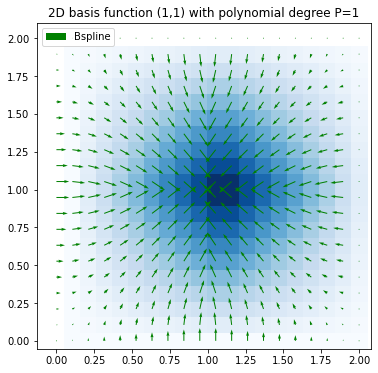

In [32]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )

#
plt.pcolormesh(X+dx, Y-dy, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")
plt.quiver(XY[:,0],XY[:,1],vx,vy,color="green",label="Bspline")
plt.axis('equal')
plt.legend()
plt.title("2D basis function (%d,%d) with polynomial degree P=%d" %(i,j,P) )
plt.show()

# Dominio 3D

## Codominio 1D

### Funzioni di base

In [2]:
#definisco la dimensionaità:
sh = Bs.shape(3, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N0 = 3
N = 5  #base caridnality
#
xmin = 0.0
xmax = 2.0
v0 = np.linspace(xmin, xmax, N0)  #[ 0,1,2,3,4,5]
left = [0-1]#[-2, -1]
right = [3]#[6, 7]
v = list(left) + list(v0) + list(right)  #[-2,-1,0,1,2,3,4,5,6,7]
N = len(v) - P - 1

#
ll = len(left)
lr = len(right)
lv = len(v0)
L  = 0#ll
R  = N#ll+N#ll + lv
NP = N#R-L

#
print("v0 :", v0)
print("v  :", v)
print("N  :", N)
print("L  :", L)
print("R  :", R)

#
kv = Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv,kv])
#bs.show()

v0 : [0. 1. 2.]
v  : [-1, 0.0, 1.0, 2.0, 3]
N  : 3
L  : 0
R  : 3


In [3]:
#grafico le funzioni di base
Nx = 10
Ny = 10
Nz = 10
Nxyz  = Nx*Ny*Nz
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
z = np.linspace(min(v),max(v),Nz,endpoint=True)
X, Y , Z = np.meshgrid(x, y, z)
XYZ = np.zeros((Nxyz,3))
XYZ[:,0] = X.reshape((Nxyz,))
XYZ[:,1] = Y.reshape((Nxyz,))
XYZ[:,2] = Z.reshape((Nxyz,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

In [4]:
#
i = 1
j = 1 
w = 1  
#
bs.clear_cp()
bs.set_cp([i,j,w],1.0)
#
t=bs.evaluate(XYZ) 
#
#der = bs.derivative()

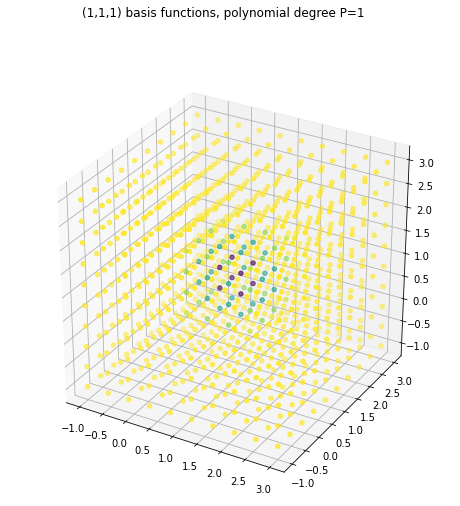

In [16]:
fig = plt.figure ( 0 , figsize = ( 8 , 8 ) )
fig.suptitle("(%d,%d,%d) basis functions, polynomial degree P=%d" % (i,j,w,P))

#
ax = fig.add_subplot(111, projection='3d')
#
# inverto i colori, quindi quelli meno presenti sono più scuri e quindi più visibili
cmap = plt.get_cmap('viridis_r')
#normalizzo, quindi vedo tutta la gamma di coloru
norm = Normalize(vmin=min(t), vmax=max(t))
ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)))
#ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
#plt.axis('equal')
plt.show()

In [17]:
der = bs.derivative()

In [18]:
vx = der[0].evaluate(XYZ)
vy = der[1].evaluate(XYZ)
vz = der[2].evaluate(XYZ)

In [19]:
T=t.reshape(Nx,Ny,Nz)
g = np.gradient(T,x,y,z)

In [20]:
gx = g[0].reshape((Nxyz,))
gy = g[1].reshape((Nxyz,))
gz = g[2].reshape((Nxyz,))

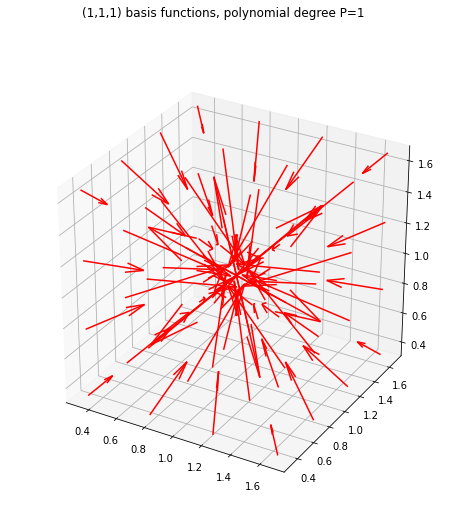

In [21]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 8 , 8 ) )
fig.suptitle("(%d,%d,%d) basis functions, polynomial degree P=%d" % (i,j,w,P))

#
ax = fig.add_subplot(111, projection='3d')
#
# inverto i colori, quindi quelli meno presenti sono più scuri e quindi più visibili
cmap = plt.get_cmap('viridis_r')
#normalizzo, quindi vedo tutta la gamma di coloru
norm = Normalize(vmin=min(t), vmax=max(t))
#ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)))
ax.quiver(XYZ[:,0],XYZ[:,1],XYZ[:,2],vx,vy,vz,color="red")
#ax.quiver(XYZ[:,0],XYZ[:,1],XYZ[:,2],gx,gy,gz,color="blue")
#ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
#plt.axis('equal')
plt.show()

In [5]:
out = bs.stiffness_matrix(opts={"delta":[2,2,2],"print":True})

preparation
dimension : 0
0 - 0  ->  0.06296491622924805  s
0 - 1  ->  0.07195138931274414  s
0 - 6  ->  0.0659635066986084  s
0 - 7  ->  0.07695627212524414  s
1 - 1  ->  0.06795406341552734  s
1 - 2  ->  0.07295942306518555  s
1 - 6  ->  0.06196165084838867  s
1 - 7  ->  0.06395959854125977  s
1 - 8  ->  0.0849463939666748  s
2 - 2  ->  0.06895756721496582  s
2 - 7  ->  0.08594441413879395  s
2 - 8  ->  0.08194899559020996  s
3 - 3  ->  0.12891936302185059  s
3 - 4  ->  0.13491487503051758  s
3 - 9  ->  0.14591026306152344  s
3 - 10  ->  0.09493708610534668  s
4 - 4  ->  0.09494256973266602  s
4 - 5  ->  0.10393190383911133  s
4 - 9  ->  0.06995606422424316  s
4 - 10  ->  0.0789480209350586  s
4 - 11  ->  0.09294509887695312  s
5 - 5  ->  0.06795859336853027  s
5 - 10  ->  0.08594679832458496  s
5 - 11  ->  0.08594751358032227  s
6 - 6  ->  0.07995080947875977  s
6 - 7  ->  0.07195496559143066  s
6 - 12  ->  0.08394432067871094  s
6 - 13  ->  0.07495474815368652  s
7 - 7  ->  0.09894

In [57]:
import copy
import pandas as pd
from scipy import integrate
import itertools 
import time

opts = {"delta" : [2,2,2]}
#definisco la funzione da integrare
def integral(*xx):
    #print(type(xx))
    return left.evaluate(xx)*right.evaluate(xx)

#mi serve solo per avere una classe costrutira correttamente
der = self.derivative()        
br = self.basis_range()

smd = list()#stifness matrix for derivatives

X = list()
for k in range(0,self.dim()):
    X.append(np.linspace(ov[k][0],ov[k][1],opts["delta"][k],endpoint=True))

m = np.meshgrid(*X)
Xintegration = np.zeros(shape=(m[0].size,self.dim()))
for k in range(0,self.dim()):
    Xintegration[:,k] = m[k].flatten()
                    

print("preparation",end="\r")
for k in range(0,self.dim()):

    print("\ndimension :",k)
    d = der[k]
    d.clear_cp()
    left = d.copy()
    right = d.copy()
    left.clear_cp()
    right.clear_cp()

    #adjacency matrix delle derivate
    am = d.adjacency_matrix()

    smd1D = am.copy()    
    smd1D[ smd1D == False ] = None

    #calcolo il prodotto scalare dei gradiente
    n = am.shape[0]
    for i in range(0,n):
        r = am.index[i] 

        #creo la funzione di base
        #left.clear_cp()
        left.set_cp(r,1.0)

        for j in range(i,n):

            c = am.columns[j]

            if am.at[r,c] is True:

                #print(i,"-",j)

                #creo la funzione di base
                #right.clear_cp()
                right.set_cp(c,1.0)
                ov = self.basis_overlap(r,c,br)
                #if ov is not None :
                start = time.time()
                res = np.mean(integral(Xintegration))
                #res = integrate.nquad( integral , ov , opts = opts)[0] #solo risultato
                endt = time.time()
                print(i,"-",j," -> ", endt - start," s")
                smd1D.at[r,c] = res
                smd1D.at[c,r] = res #matrice simmetrica

                #cancello
                right.set_cp(c,0.0)

            #cancello
            left.set_cp(r,0.0)


    smd.append(smd1D)

###
#calcolo la stifness matrix vera e propria
am = self.adjacency_matrix()
sm1D = am.copy()    
sm1D[ sm1D == False ] = None

sm = list()

n = sm1D.shape[0]#quadrata

#creo una copia della Bspline
left  = self.copy()
left.clear_cp()
right = self.copy()
right.clear_cp()


print("\nstifness matrix",end="\r")
for k in range(0,self.dim()):
    print("\ndimension :",k)

    for i in range(0,n):

        r = am.index[i] 
        #left.clear_cp()
        left.set_cp(r,1.0)
        dl = left.derivative()[k]

        #cancello
        left.set_cp(r,0.0)


        cpl = dl._cp.astype(float) #left control points
        nzcpl = np.argwhere( cpl != 0.).tolist() #non zero control points (left) indices


        for j in range(i,n):
            print(i,"-",j,end="\r")

            c = am.columns[j]        
            #right.clear_cp()
            right.set_cp(c,1.0)
            dr = right.derivative()[k]
            #cancello
            right.set_cp(c,0.0)

            cpr = dr._cp.astype(float) #left control points
            nzcpr = np.argwhere( cpl != 0.).tolist() #non zero control points (right) indices

            allpairs = list(itertools.product(nzcpl,nzcpr)) #attenzione all'ordine

            sm1D.at[r,c] = 0.0            
            for w in range(0,len(allpairs)):
                li = tuple(allpairs[w][0])
                ri = tuple(allpairs[w][1])
                ll = cpl[li]
                rr = cpr[ri]
                #if ll != 0.0 and rr != 0.0 :                    
                dd = smd[k].at[li,ri]
                if dd is None : dd = 0.0
                sm1D.at[r,c] = sm1D.at[r,c] + ll*rr*dd

            sm1D.at[c,r] = sm1D.at[r,c]

    sm.append(sm1D)

#return sum(sm)

preparation
dimension : 0
0 - 0  ->  0.10027503967285156  s
0 - 1  ->  0.06901788711547852  s
0 - 6  ->  0.08464503288269043  s
0 - 7  ->  0.10027408599853516  s
1 - 1  ->  0.08463358879089355  s
1 - 2  ->  0.06900882720947266  s
1 - 6  ->  0.09376144409179688  s
1 - 7  ->  0.10027027130126953  s
1 - 8  ->  0.11590123176574707  s
2 - 2  ->  0.14715957641601562  s
2 - 7  ->  0.20053410530090332  s
2 - 8  ->  0.13802599906921387  s
3 - 3  ->  0.07813072204589844  s
3 - 4  ->  0.0690157413482666  s
3 - 9  ->  0.08464622497558594  s
3 - 10  ->  0.06901741027832031  s
4 - 4  ->  0.06249713897705078  s
4 - 5  ->  0.05339694023132324  s
4 - 9  ->  0.08464336395263672  s
4 - 10  ->  0.0846405029296875  s
4 - 11  ->  0.0625007152557373  s
5 - 5  ->  0.06901240348815918  s
5 - 10  ->  0.1002647876739502  s
5 - 11  ->  0.06901383399963379  s
6 - 6  ->  0.06249737739562988  s
6 - 7  ->  0.10026335716247559  s
6 - 12  ->  0.0690157413482666  s
6 - 13  ->  0.0690157413482666  s
7 - 7  ->  0.06900429

In [17]:
opts = {"delta" : [10,10,10]}
ov[0]

[-1.0, 1.0]

In [47]:
X = list()
for k in range(0,self.dim()):
    X.append(np.linspace(ov[k][0],ov[k][1],opts["delta"][k],endpoint=True))
    
m = np.meshgrid(*X)
Y = np.zeros(shape=(m[0].size,self.dim()))
for k in range(0,self.dim()):
    Y[:,k] = m[k].flatten()

In [52]:
Y[:,0]

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -0.77777778, -0.77777778, -0.77777778, -0.77777778, -0.77777778,
       -0.77777778, -0.77777778, -0.77777778, -0.77777778, -0.77777778,
       -0.55555556, -0.55555556, -0.55555556, -0.55555556, -0.55555556,
       -0.55555556, -0.55555556, -0.55555556, -0.55555556, -0.55555556,
       -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
       -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
       -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
       -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        0.11111111,  0.11111111,  0.11111111,  0.11111111,  0.11111111,
        0.11111111,  0.11111111,  0.11111111,  0.11111111,  0.11111111,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
        0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33

In [46]:
Y

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [59]:
opts["print"] = True

In [5]:
if "print" not in opts:
    print("ciao")

NameError: name 'opts' is not defined

In [9]:
if hasattr(np.zeros(3), '__len__'):
    print("ciao")

ciao
